# Understanding Over & Underfitting

## Predicting Boston Housing Prices

## Environment

In [131]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.metrics import r2_score


## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

<font color='blue'>Load the dataset
</font>

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(np.c_[boston['data'], boston['target']],
                  columns= np.append(boston['feature_names'], ['target']))


<font color='blue'>Explore the dataset
</font>

In [6]:
df.shape

(506, 14)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

<font color='blue'>Search for NaN
</font>

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<font color='blue'>Outliers
</font>

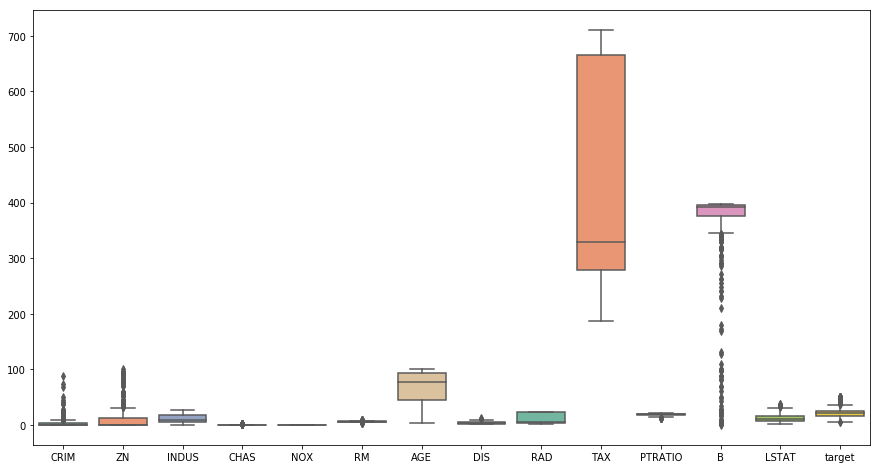

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, palette="Set2")
plt.show()

In [11]:
#function to find ouliers
def find_anomalies(random_data):
    """ Calculates outliers per column
    INPUT: dadaframe column
    OUTPUT: values of the outliers """
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    # Generate outliers
    anomalies = []
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [12]:
for column in df:
    print(f'{column}: {find_anomalies(df[column])}')

CRIM: [88.9762, 38.3518, 41.5292, 67.9208, 51.1358, 45.7461, 73.5341, 37.6619]
ZN: [90.0, 85.0, 100.0, 95.0, 95.0, 82.5, 82.5, 95.0, 95.0, 90.0, 90.0, 90.0, 85.0, 90.0]
INDUS: []
CHAS: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
NOX: []
RM: [8.725, 8.704, 8.398, 8.78, 3.561, 3.863, 4.138, 4.138]
AGE: []
DIS: [10.7103, 10.7103, 12.1265, 10.5857, 10.5857]
RAD: []
TAX: []
PTRATIO: []
B: [70.8, 2.6, 35.05, 28.79, 27.25, 21.57, 16.45, 48.45, 2.52, 3.65, 7.68, 24.65, 18.82, 60.72, 81.33, 27.49, 9.32, 68.95, 43.06, 0.32, 6.68, 50.92, 10.48, 3.5, 22.01]
LSTAT: [34.41, 34.77, 37.97, 34.37, 36.98]
target: []


<font color='blue'>I will delete only the B outliers
</font>

In [13]:
out_index = []

anomalies = find_anomalies(df['B'])
for anomalie in anomalies:
    out_index.append(df.loc[df['B'] == anomalie].index[0])
out_index.sort()
print(out_index)

[102, 410, 411, 412, 415, 416, 418, 419, 423, 424, 425, 426, 427, 429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466]


In [14]:
df_clean = df.drop(out_index)

In [15]:
df.shape

(506, 14)

In [16]:
df_clean.shape

(481, 14)

In [17]:
df_clean.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

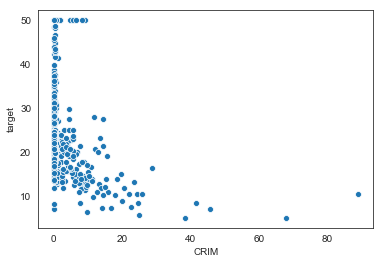

In [18]:
sns.set_style("white")
sns.scatterplot(x="CRIM", y="target", data=df_clean)
plt.show()

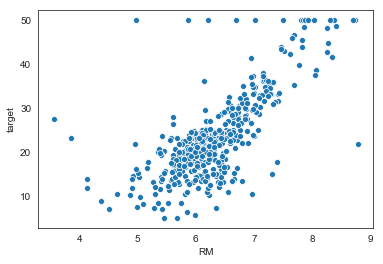

In [19]:
sns.set_style("white")
sns.scatterplot(x="RM", y="target", data=df_clean)
plt.show()

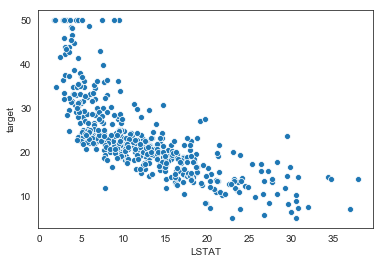

In [20]:
sns.set_style("white")
sns.scatterplot(x="LSTAT", y="target", data=df_clean)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

<font color='blue'>**COMMENTS**:<br>
    * The lower the crime, the higher the price
    * The more average rooms, the higher the price
    * The higher the % of lower status of the population, the lower the price
</font>

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [21]:
corr = df_clean.corr()

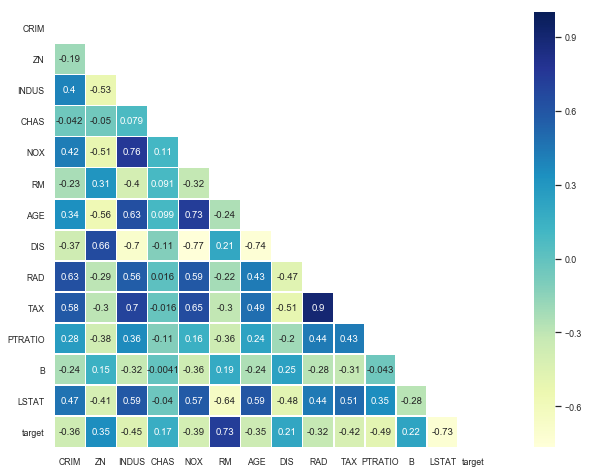

In [22]:
plt.figure(figsize=(16,8))
sns.set(font_scale=0.8)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap="YlGnBu", linewidths=.5, annot=True)
    

<font color='blue'>Stangely, the TAX and the RAD seam to be very correlated
</font>

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [23]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,481.0,2.988279,7.552792,0.00632,0.07886,0.22212,2.3139,88.9762
ZN,481.0,11.954262,23.773760,0.00000,0.00000,0.00000,20.0000,100.0000
INDUS,481.0,10.794699,6.852758,0.46000,5.13000,8.56000,18.1000,27.7400
CHAS,481.0,0.072765,0.260021,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,481.0,0.548912,0.115110,0.38500,0.44800,0.52400,0.6240,0.8710
RM,481.0,6.288757,0.711855,3.56100,5.88000,6.20900,6.6250,8.7800
AGE,481.0,67.494179,28.367029,2.90000,42.40000,74.90000,93.8000,100.0000
DIS,481.0,3.885047,2.119684,1.12960,2.13980,3.37510,5.2873,12.1265
RAD,481.0,8.837838,8.292988,1.00000,4.00000,5.00000,8.0000,24.0000
TAX,481.0,395.426195,162.469700,187.00000,277.00000,329.00000,437.0000,711.0000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
# Your code here
X = df_clean.iloc[:,:13]
y = df_clean.iloc[:,13:]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [27]:
# Five separate RFR here with the given max depths
max_depths = [2, 4, 6, 8, 10]

In [28]:
dict_train = {}
dict_test = {}

In [29]:
for max_depth in max_depths:
    regr = RandomForestRegressor(max_depth=max_depth, random_state=10, n_estimators=100)
    regr.fit(X_train, y_train)
    y_pred_train = regr.predict(X_train)
    score_train = performance_metric(y_train, y_pred_train)
    dict_train[max_depth] = score_train    
    y_pred_test = regr.predict(X_test)
    score_test = performance_metric(y_test, y_pred_test)
    dict_test[max_depth] = score_test


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

Now, plot the score for each tree on the training set and on the testing set.

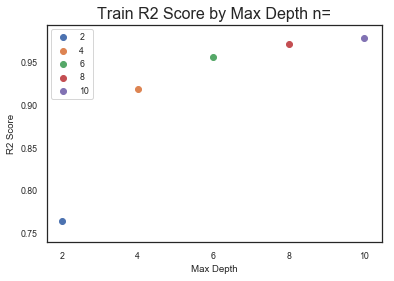

In [38]:
# Produce a plot with the score for the testing and training for the different max depths
sns.set_style("white")
for key in dict_train:
    plt.scatter(key, dict_train[key], label=key)
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.xticks([2, 4, 6, 8, 10])
plt.title('Train R2 Score by Max Depth n=', fontsize=16)
plt.legend()
plt.show()



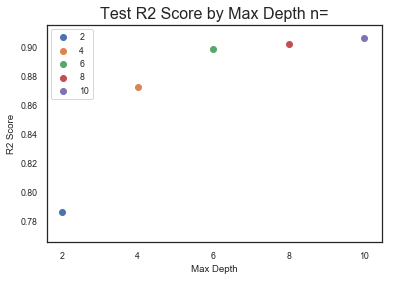

In [39]:
sns.set_style("white")
for key in dict_test:
    plt.scatter(key, dict_test[key], label=key)
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.xticks([2, 4, 6, 8, 10])
plt.title('Test R2 Score by Max Depth n=', fontsize=16)
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

<font color='blue'>The Max Depth as it increases, the R2 score increases, till a point where the increase in max death do not brings almost any marginal increase in R2.<br>
In this particular case I think Max Depth = 6 should be the higher we go.
</font>

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [95]:
X = df_clean.iloc[:,:13]
y = df_clean.iloc[:,13:]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=False)


In [97]:
regr = RandomForestRegressor(max_depth=1, random_state=10, n_estimators=100)
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [98]:
df_train_1 = pd.DataFrame(y_pred_train, columns=['y_pred_train'])

In [99]:
df_train_1 = pd.concat([df_train_1, y_train], axis=1)

In [100]:
df_train_1.head()

,y_pred_train,target
0,22.363862,24.0
1,21.553521,21.6
2,37.073696,34.7
3,36.892042,33.4
4,35.904214,36.2


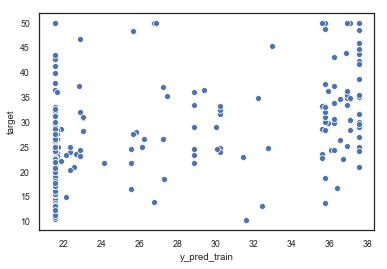

In [101]:
sns.set_style("white")
sns.scatterplot(x='y_pred_train', y='target', data=df_train_1)
plt.show()

In [102]:
df_test_1 = pd.DataFrame(y_pred_test, columns=['y_pred_test'])
y_test.reset_index(inplace=True)
df_test_1 = pd.concat([df_test_1, y_test], axis=1)
df_test_1.head()

,y_pred_test,index,target
0,21.553521,385,7.2
1,21.553521,386,10.5
2,21.553521,387,7.4
3,21.553521,388,10.2
4,21.553521,389,11.5


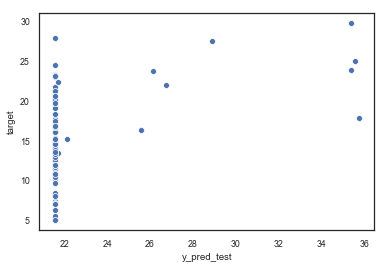

In [103]:
sns.set_style("white")
sns.scatterplot(x='y_pred_test', y='target', data=df_test_1)
plt.show()

<font color='blue'>If we set the max depth level at 1 the bias is HIGH and the variance is low
</font>

In [108]:
regr = RandomForestRegressor(max_depth=10, random_state=10, n_estimators=100)
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [109]:
df_train_10 = pd.DataFrame(y_pred_train, columns=['y_pred_train'])

In [110]:
df_train_10 = pd.concat([df_train_10, y_train], axis=1)

In [111]:
df_train_10.head()

,y_pred_train,target
0,25.707325,24.0
1,22.499446,21.6
2,34.717288,34.7
3,33.996635,33.4
4,35.703625,36.2


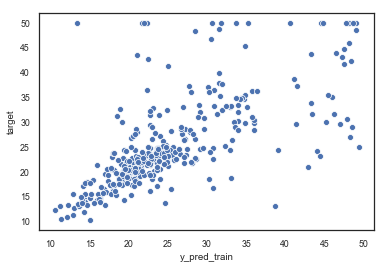

In [112]:
sns.set_style("white")
sns.scatterplot(x='y_pred_train', y='target', data=df_train_10)
plt.show()

In [113]:
df_test_10 = pd.DataFrame(y_pred_test, columns=['y_pred_test'])
y_test.reset_index(inplace=True)
df_test_10 = pd.concat([df_test_10, y_test], axis=1)
df_test_10.head()

,y_pred_test,level_0,index,target
0,11.806400,0,385,7.2
1,11.470000,1,386,10.5
2,11.536000,2,387,7.4
3,12.214600,3,388,10.2
4,13.168421,4,389,11.5


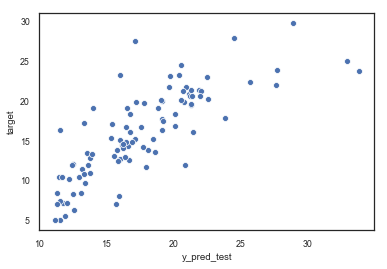

In [114]:
sns.set_style("white")
sns.scatterplot(x='y_pred_test', y='target', data=df_test_10)
plt.show()

<font color='blue'>If we set the max depth level at 10 the bias is low and the variance is higher
</font>

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [118]:
X = df_clean.iloc[:,:13]
y = df_clean.iloc[:,13:]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=False)


In [120]:
regr = RandomForestRegressor(max_depth=6, random_state=10, n_estimators=100)
regr.fit(X_train, y_train)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [121]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

In [122]:
score_train = performance_metric(y_train, y_pred_train)

In [123]:
score_test = performance_metric(y_test, y_pred_test)

In [124]:
print(f'R2 score train for train with max depth 6 is: {score_train}')

R2 score train for train with max depth 6 is: 0.955641953935455


In [125]:
print(f'R2 score test for train with max depth 6 is: {score_train}')

R2 score test for train with max depth 6 is: 0.955641953935455


<font color='blue'>I think the max depth 6 gives us enough accuracy but do not overfit the model
</font>

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

<font color='blue'>**OPINION**:<br>
* How relevant today is data that was collected from 1978? Some of the variables, can have changed the values but still have influence in the prices. Although, other issues could interfere with the model, as nowadays other thing are important for buying a house.<br>
* Are the features present in the data sufficient to describe a home? No the data is more accurate to describe an area, not a particular home <br>
* Is the model robust enough to make consistent predictions? I think it could use some ore data to be more robust, as 500 rows is quite poor.
* Would data collected in an urban city like Boston be applicable in a rural city?I do not think so, as the vars taht would afect the price will be different
</font>